In [3]:
# Rodrigo Caye Daudt
# rodrigo.cayedaudt@geod.baug.ethz.ch
# 02/2021

from glob import glob
import numpy as np
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import statistics
import os
import sys

import utils

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/gsa/anaconda3/envs/remote_sensing/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)



Images may look weird at this point due to automatic scaling that doesn't ignore no_data pixels.



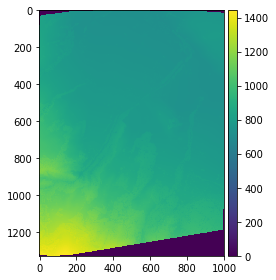

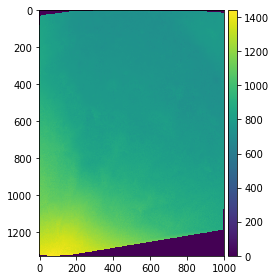

In [21]:
# Load images

SCENE = 2 # 1 or 2
PATCH_SIZE = 7 # 7 or 15

# Image paths
reference_path = 'interpolated/scene-{}_{}x{}_lidar.tif'.format(SCENE, PATCH_SIZE, PATCH_SIZE)
interpolated_path = 'interpolated/scene-{}_{}x{}_interpolated.tif'.format(SCENE, PATCH_SIZE, PATCH_SIZE)

# Load data
lidar = np.array(io.imread(reference_path))
interpolated = np.array(io.imread(interpolated_path))

# Mask images to isolate valid values, interpolated uses nodata_val=-9999
mask_valid, mask_invalid = utils.get_mask(interpolated)
lidar_vec = lidar[mask_valid]
lidar[mask_invalid] = 0
interpolated_vec = interpolated[mask_valid]
interpolated[mask_invalid] = 0

# Visualize
plt.figure()
io.imshow(lidar)
plt.figure()
io.imshow(interpolated)

print('\nImages may look weird at this point due to automatic scaling that doesn\'t ignore no_data pixels.\n')

CALCULATE GLOBAL MIN AND MAX TO GENERATE ALL 4 PLOTS IN THE SAME SCALE
CALCULATE GLOBAL MIN AND MAX TO GENERATE ALL 4 PLOTS IN THE SAME SCALE


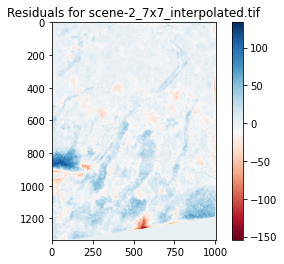

In [22]:

if not os.path.exists('./outputs'):
    os.mkdir('./outputs')

# Generate residuals image
residuals = utils.get_residuals(lidar, interpolated, mask_invalid=mask_invalid)
plt.figure()
plt.title('Residuals for {}'.format(interpolated_path.split('/')[-1]))

vmin = residuals.min(); print('CALCULATE GLOBAL MIN AND MAX TO GENERATE ALL 4 PLOTS IN THE SAME SCALE')
vmax = residuals.max(); print('CALCULATE GLOBAL MIN AND MAX TO GENERATE ALL 4 PLOTS IN THE SAME SCALE')

plt.imshow(residuals, cmap='RdBu', vmin=vmin, vmax=vmax)
plt.colorbar()

plt.savefig('outputs/{}'.format(interpolated_path.split('/')[-1].replace('_interpolated.tif', '.pdf')))
plt.savefig('outputs/{}'.format(interpolated_path.split('/')[-1].replace('_interpolated.tif', '.png')))




In [23]:
# Analyse residual values

# Get vectorized residuals which doesn't contain pixels with no data
residuals_vec = utils.get_residuals(lidar_vec, interpolated_vec)

# Minimum
residuals_min = min(residuals_vec)

# Maximum
residuals_max = max(residuals_vec)

# Mean
residuals_mean = statistics.mean(residuals_vec)

# Standard deviation
residuals_std = statistics.stdev(residuals_vec)

# Median
residuals_median = statistics.median(residuals_vec)

# Median absolute deviation from median (MAD)
# residuals_MAD = scipy.stats.median_absolute_deviation(residuals_vec)
residuals_MAD =  statistics.median(abs(residuals_vec - residuals_median))

# Mode - round values somehow, e.g. converting to int, then use statistics.mode
residuals_mode = statistics.mode([round(i) for i in residuals_vec])


# Gather and save results, don't change anything from this point on unless you have a good reason

metrics = {
    'Minimum': residuals_min,
    'Maximum': residuals_max,
    'Mean': residuals_mean,
    'Standard deviation': residuals_std,
    'Median': residuals_median,
    'MAD': residuals_MAD,
    'Mode': residuals_mode,
}

output_file_name = 'outputs/{}'.format(interpolated_path.split('/')[-1].replace('_interpolated.tif', '.txt'))
if os.path.exists(output_file_name):
    os.remove(output_file_name)
original_stdout = sys.stdout # Save a reference to the original standard output
with open(output_file_name, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print('File name: {}\n\n'.format(interpolated_path.split('/')[-1]))
    for k in metrics.keys():
        print(f'{k}: {metrics[k]}')
    sys.stdout = original_stdout # Reset the standard output to its original value

print(f'Metrics saved to {output_file_name}')
    

Metrics saved to outputs/scene-2_7x7.txt
